# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [ ]:
fraud = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv')
fraud.head()

**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

### 1. Distribution of the Target Variable

In [ ]:
# missing values and data types
print(fraud.info())

# distribution of the target variable
fraud_distribution = fraud['fraud'].value_counts()
print(fraud_distribution)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB
None
fraud
0.0    912597
1.0     87403
Name: count, dtype: int64


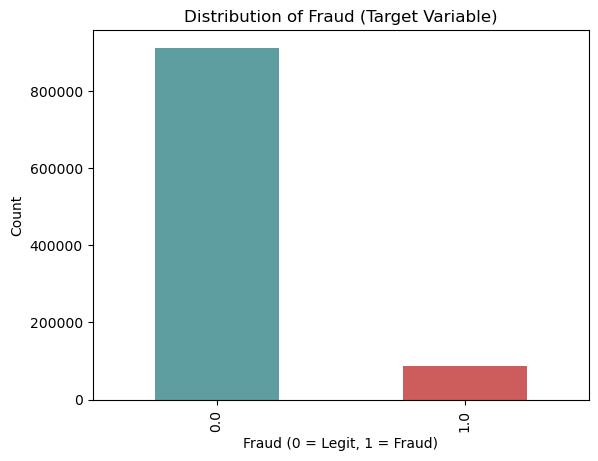

In [ ]:
# plot distribution
fraud_distribution.plot(kind='bar', color=['cadetblue', 'indianred'])
plt.title('Distribution of Fraud (Target Variable)')
plt.xlabel('Fraud (0 = Legit, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

### 2. Train a Logistic Regression

In [ ]:
# feature columns (exclude 'fraud')
X = fraud.drop(columns=['fraud'])
y = fraud['fraud']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train a Logistic Regression model
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### 3. Evaluate Model

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

[[170350  12207]
 [   849  16594]]


### 4. Run Oversample

In [ ]:
# oversample minority class
ros = RandomOverSampler(random_state=42)
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)

# train on balanced data
model.fit(X_train_oversampled, y_train_oversampled)

y_pred_oversampled = model.predict(X_test)

print('Oversampled Data Evaluation')
print(classification_report(y_test, y_pred_oversampled))
print(confusion_matrix(y_test, y_pred_oversampled))

Oversampled Data Evaluation
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

[[170347  12210]
 [   852  16591]]


### 5. Run Undersample

In [ ]:
# undersample majority class
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# train model on balanced data
model.fit(X_train_undersampled, y_train_undersampled)

y_pred_undersampled = model.predict(X_test)

print('Undersampled Data Evaluation')
print(classification_report(y_test, y_pred_undersampled))
print(confusion_matrix(y_test, y_pred_undersampled))

Undersampled Data Evaluation
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

[[170295  12262]
 [   842  16601]]


### 5. Run SMOTE

In [ ]:

# SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# train on SMOTE data
model.fit(X_train_smote, y_train_smote)

y_pred_smote = model.predict(X_test)

print('SMOTE Data Evaluation')
print(classification_report(y_test, y_pred_smote))
print(confusion_matrix(y_test, y_pred_smote))

SMOTE Data Evaluation


'              precision    recall  f1-score   support\n\n         0.0       1.00      0.93      0.96    182557\n         1.0       0.58      0.95      0.72     17443\n\n    accuracy                           0.93    200000\n   macro avg       0.79      0.94      0.84    200000\nweighted avg       0.96      0.93      0.94    200000\n'

[[170334  12223]
 [   848  16595]]
